In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math as math
import datetime as dt

r = requests.get('https://data.winnipeg.ca/resource/du7c-8488.json')

trapDF = pd.DataFrame(r.json())
#trapDF.shape

# This part changes 'no data' entries to NaN entries
for cols in list(trapDF.columns):
    for indx in trapDF.index:
        if trapDF.at[indx, cols]=='no data':
            trapDF.at[indx, cols]=np.NaN
# changing coun_date type
trapDF['count_date'] = pd.to_datetime(trapDF['count_date'])            

trapDF=trapDF.sort_values(by=['count_date'])

# changing everything else to date type
for cols in list(trapDF.columns):
    if cols!='count_date':
        trapDF[cols]=pd.to_numeric(trapDF[cols])
        
        
        
#estimate on how many rows have NaN in it
#count=0
#for indx in list(trapDF.index):
#    bad=False
#    for cols in list(trapDF.columns):
#        if trapDF.at[int(indx), cols] is np.nan:
#            bad=True
#    if bad:
#        count+=1
#print(count)

# separating data into years
trapDF2015=trapDF[trapDF['count_date'].dt.year==2015]
#trapDF2015.set_index('count_date', inplace=True)
#trapDF2015.dtypes
trapDF2016=trapDF[trapDF['count_date'].dt.year==2016]
trapDF2017=trapDF[trapDF['count_date'].dt.year==2017]
trapDF2018=trapDF[trapDF['count_date'].dt.year==2018]
trapDF2019=trapDF[trapDF['count_date'].dt.year==2019]
trapDF2020=trapDF[trapDF['count_date'].dt.year==2020]
trapDF2021=trapDF[trapDF['count_date'].dt.year==2021]

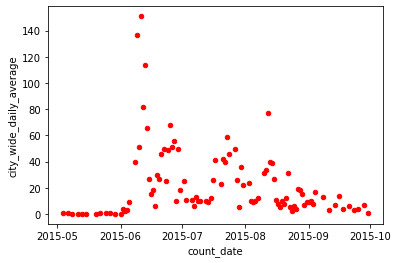

In [94]:
# some ilustrations
trapDF2015.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

In [8]:
trapDF2016.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

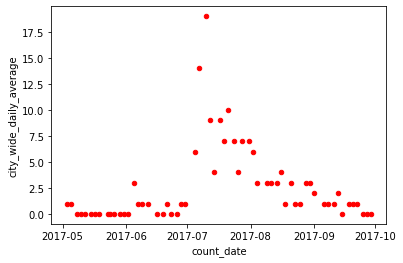

In [9]:
trapDF2017.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

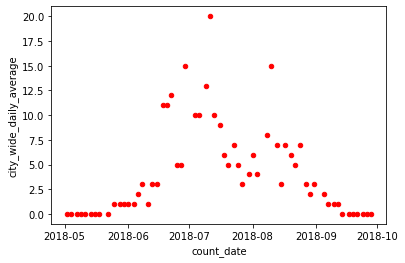

In [10]:
trapDF2018.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

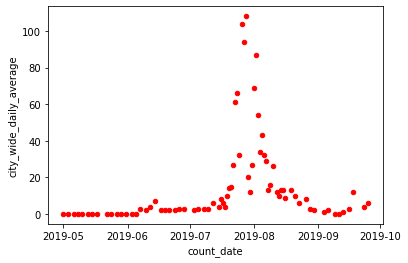

In [11]:
trapDF2019.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

In [14]:
trapDF2020.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

In [16]:
trapDF2021.plot(kind='scatter',x='count_date',y='city_wide_daily_average',color='red')
plt.show()

In [123]:
trapDF2015.head(40)

count_date  city_wide_daily_average  trap_days  north_west_1  north_west_2  \
0  2015-05-04                        1          3           1.0           2.0   
1  2015-05-06                        1          2           2.0           1.0   
2  2015-05-08                        0          2           0.0           0.0   
3  2015-05-11                        0          3           0.0           0.0   
4  2015-05-13                        0          2           1.0           0.0   
5  2015-05-15                        0          2           0.0           0.0   
6  2015-05-20                        0          5           0.0           0.0   
7  2015-05-22                        1          2           1.0           1.0   
8  2015-05-25                        1          3           3.0           0.0   
9  2015-05-27                        1          2           2.0           0.0   
10 2015-05-29                        0          2           0.0           0.0   
11 2015-06-01                        0          3           0.0           1.0   
12 2015-06-02                        4          1           2.0           7.0   
13 2015-06-03                        2          1           2.0           2.0   
14 2015-06-04                        3          1           2.0           1.0   
15 2015-06-05                        9          1           8.0          12.0   
16 2015-06-08                       40          3          69.0          93.0   
17 2015-06-09                      137          1          44.0           NaN   
18 2015-06-10                       51          1          29.0          98.0   
19 2015-06-11                      151          1         236.0         248.0   
20 2015-06-12                       82          1         136.0         276.0   
21 2015-06-13                      114          1         244.0          88.0   
22 2015-06-14                       66          1         132.0         120.0   
23 2015-06-15                       27          1          25.0          19.0   
24 2015-06-16                       15          1          19.0           4.0   
25 2015-06-17                       18          1           4.0           8.0   
26 2015-06-18                        6          1           3.0           4.0   
27 2015-06-19                       30          1          54.0          26.0   
28 2015-06-20                       27          1          64.0          42.0   
29 2015-06-21                       46          1          76.0          87.0   
30 2015-06-22                       50          1         104.0          44.0   
31 2015-06-23                       25          1          28.0          19.0   
32 2015-06-24                       49          1          84.0          47.0   
33 2015-06-25                       68          1          76.0          41.0   
34 2015-06-26                       51          1          57.0          33.0   
35 2015-06-27                       56          1          81.0          25.0   
36 2015-06-28                       10          1          22.0          14.0   
37 2015-06-29                       50          1          78.0          68.0   
38 2015-06-30                       18          1           9.0          16.0   
39 2015-07-02                       25          2          35.0          25.0   

    north_west_3  north_west_4  north_west_5  north_west_6  north_west_7  ...  \
0            1.0           0.0           2.0           0.0           1.0  ...   
1            2.0           1.0           3.0           0.0           3.0  ...   
2            0.0           0.0           0.0           0.0           1.0  ...   
3            0.0           0.0           0.0           0.0           0.0  ...   
4            0.0           1.0           1.0           0.0           1.0  ...   
5            0.0           1.0           1.0           0.0           1.0  ...   
6            0.0           0.0           0.0           0.0           0.0  ...   
7            0.0           2.0   

In [122]:
### Split 2015 data into approximately 7 days intervals, start and end date fro each interval is stored in int_list2015
int_list2015=[]
for indx1 in list(trapDF2015.index):
    k=0
    while (trapDF2015.at[int(indx1)+k, 'count_date']-trapDF2015.at[int(indx1), 'count_date']).days<8:
            k+=1
            if int(indx1)+k>=len(list(trapDF2015.index)):
                break
    indx2=int(indx1)+k-1
    if indx1!=indx2:
        #print(trapDF2015.at[int(indx1), 'count_date'],'--',trapDF2015.at[indx2, 'count_date'])
        int_list2015.append((indx1,indx2))

25 32
[0, 0, 0, 0, 0, 0, 0, 0]
0 4.0
1 3.0
2 54.0
3 64.0
4 76.0
5 104.0
6 28.0
7 84.0


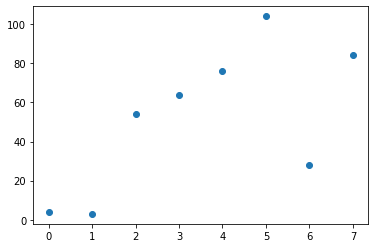

In [127]:
#ind=0, 10, 20
#ind indicates initial index from which approximation starts
ind=25
l, r=int_list2015[ind]
print(l,r)

# n is the number of days, expect n to be 8.
n=(trapDF2015.at[r,'count_date']-trapDF2015.at[l,'count_date']).days+1
x_ar = [] #  x=[0,...,7]
for i in range(n):
    x_ar.append(i)
x= np.array(x_ar)


y_ar=[] #y_ar is taken to be the mosquito counts on days 0-7
for i in range(n):
    y_ar.append(0)
print(y_ar)
for i in range(r-l+1):
    y_ar[(trapDF2015.at[l+i,'count_date']-trapDF2015.at[l,'count_date']).days]=trapDF2015.at[l+i,'north_west_1']
    print((trapDF2015.at[l+i,'count_date']-trapDF2015.at[l,'count_date']).days, trapDF2015.at[l+i,'north_west_1'] )
#print(y_ar)
y=np.array(y_ar)
plt.scatter(x,y)

In [128]:
# Logistice equation (no differential equation, since we know the solution) k= maximal capacity, p= initial population, r=growth rate
def my_logistic(t,k,p,r):
    return p*k*np.exp(r*t)/((k-p)+p*np.exp(r*t))

# initial value of parameters
k=np.random.uniform(0,100)
p=np.random.uniform(0,100)
r=np.random.uniform(0,20)
p0=[k,p,r]
print(p_0)

# lower bounds for parameters is set to 0, upperbounds to some values, took 200 for k,p, since 170 is maximum mosquito count per each trap
bounds=(0, [200, 200, 100])
# Magic happens next to find best fit for parameters on (k,p,r), do not ask we how, some kind of least square method with binary search?
import scipy.optimize as optim
(k,p,r), cov= optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)
print(k,p,r) #optimal values of parameters

[14.35001183306861, 83.41570100481638, 12.605603568716173]
71.36831050198086 0.08380241212672063 3.9215630908198844


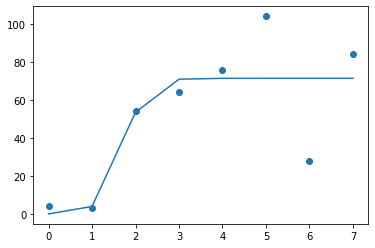

In [130]:
def ohmy_logistic(t):
    return p*k*np.exp(r*t)/((k-p)+p*np.exp(r*t))
plt.scatter(x,y)
plt.plot(x, ohmy_logistic(x)) # comparison, not too close, but we could live with it?